# "Fire Incidents in City of Pittsburgh" Dataset Filtering

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

fire = pd.read_csv("FireIncidentsPitt.tsv", sep = "\t")
df = fire[["neighborhood","type_description"]]

In [127]:
df = df.sort_values(by="neighborhood")
df = df.dropna(subset=["neighborhood"]) #get rid of values that do not have an associated neighborhood
df.head()

,neighborhood,type_description
3157,Allegheny Center,"Cooking fire, confined to container"
4291,Allegheny Center,"Cooking fire, confined to container"
1266,Allegheny Center,"Natural vegetation fire, Other"
8288,Allegheny Center,"Outside rubbish, trash or waste fire"
9278,Allegheny Center,Brush or brush-and-grass mixture fire


## Incident Types:
Find Out the Total Number of Incidents of each type and determine which ones are important (More than 50 Incidents)

In [128]:
counts = df["type_description"].value_counts() 
frequent_types = counts[counts > 50].index.tolist()

for type_description in frequent_types:
    total = counts[type_description]
    print(type_description, ":", total)
    subset = df[df["type_description"] == type_description] 

filtered_types = counts[counts > 100].index
filtered_df = df[df["type_description"].isin(filtered_types)]

Cooking fire, confined to container : 2004
Building fire : 1899
Passenger vehicle fire : 948
Outside rubbish, trash or waste fire : 747
Brush or brush-and-grass mixture fire : 542
Outside rubbish fire, Other : 534
Dumpster or other outside trash receptacle fire : 434
Trash or rubbish fire, contained : 407
Natural vegetation fire, Other : 256
Special outside fire, Other : 224
Mobile property (vehicle) fire, Other : 175
Fire, Other : 166
Fires in structure other than in a building : 143
Grass fire : 124
Outside equipment fire : 70
Fuel burner/boiler malfunction, fire confined : 57


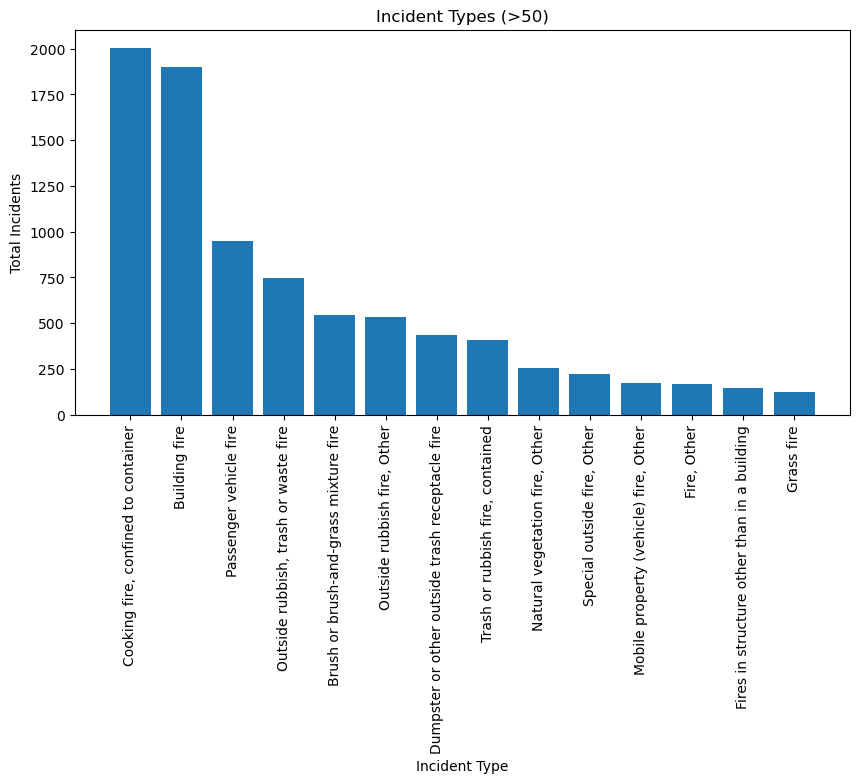

In [104]:
plt.figure(figsize=(10, 5))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xticks(rotation=90)   
plt.xlabel("Incident Type")
plt.ylabel("Total Incidents")
plt.title("Incident Types (>50)")
plt.show()

In [118]:
neighborhood_counts = filtered_df["neighborhood"].value_counts()
for neighborhood, count in neighborhood_counts.items():
    print(neighborhood, ":", count)

Carrick : 313
South Side Flats : 294
Central Business District : 279
Squirrel Hill South : 267
Hazelwood : 251
East Liberty : 225
Mount Washington : 222
Lincoln-Lemington-Belmar : 201
Brookline : 201
Homewood South : 199
Knoxville : 198
Shadyside : 195
Homewood North : 193
Bloomfield : 183
Sheraden : 174
Perry South : 167
East Hills : 160
Beechview : 158
Bluff : 155
Marshall-Shadeland : 154
Brighton Heights : 153
East Allegheny : 140
Central Northside : 137
Beltzhoover : 134
Squirrel Hill North : 134
Allentown : 132
North Oakland : 131
Greenfield : 125
Larimer : 123
Garfield : 119
Spring Hill-City View : 115
Crawford-Roberts : 112
Perry North : 110
South Side Slopes : 108
Middle Hill : 106
South Oakland : 99
Central Oakland : 96
Troy Hill : 87
Terrace Village : 87
Crafton Heights : 85
North Shore : 84
Highland Park : 83
Strip District : 77
Central Lawrenceville : 76
Manchester : 76
Point Breeze : 74
Elliott : 74
Lincoln Place : 70
Northview Heights : 65
West Oakland : 65
Homewood West 

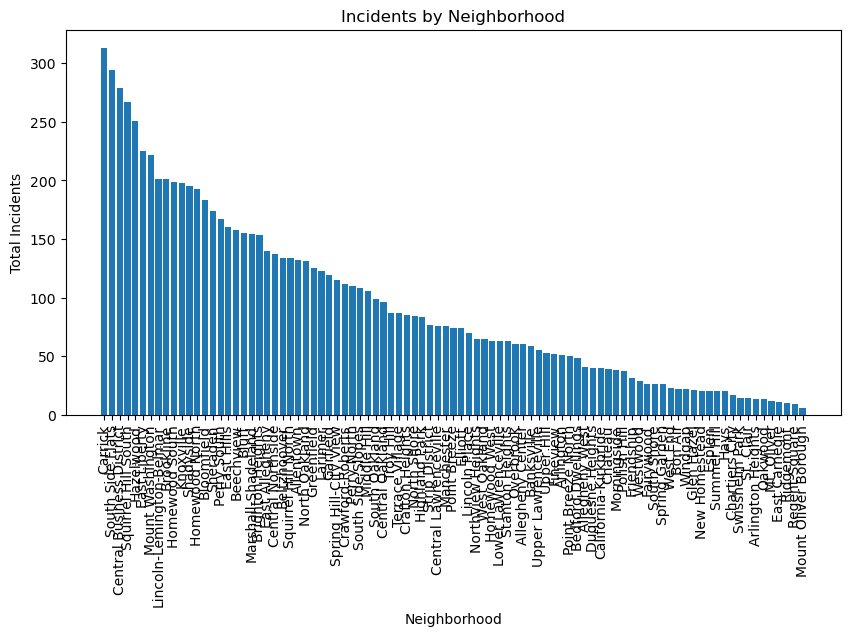

In [121]:
plt.figure(figsize=(10, 5))
plt.bar(neighborhood_counts.index, neighborhood_counts.values)
plt.xticks(rotation=90)   
plt.xlabel("Neighborhood")
plt.ylabel("Total Incidents")
plt.title("Incidents by Neighborhood")
plt.show()

## Top 15 Scorers:

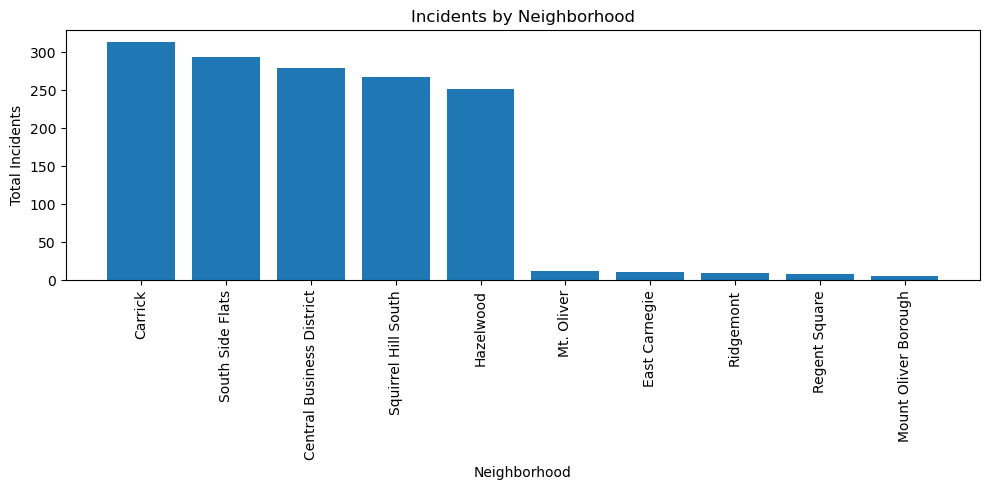

In [125]:
top5 = neighborhood_counts.head(5)
bottom5 = neighborhood_counts.tail(5)
combined = pd.concat([top5, bottom5])

plt.figure(figsize=(10, 5))
plt.bar(combined.index, combined.values)
plt.xticks(rotation=90)   
plt.xlabel("Neighborhood")
plt.ylabel("Total Incidents")
plt.title("Incidents by Neighborhood")
plt.tight_layout()
plt.show()

# Best (And Worst) Neighborhood

The top three worst neighborhoods were the ones with the highest score. As seen in the graph, the worst is Carrick, with 313 incidents, followed by the South Side Flats and the Central Business District with 294 and 279 incidents respectfully.

The top three best neighborhoods were the ones with the lowest score. In first goes to Mount Oliver Borough, with only 6 incidents total, followed by Regent Square with 9 and Ridgemont with 10.

The best neighborhood according to the amount of Fire Incidents is Mount Oliver Borough.